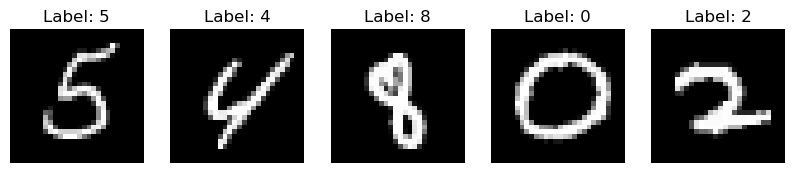

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train.iloc[i]}')
    ax.axis('off')
plt.show()


In [42]:
class my_PCA:
    def __init__(self):
        self.mean = None
        self.components = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        Xc = X - self.mean

        U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
        self.components = Vt.T  # Собственные векторы

    def transform(self, X):
        Xc = X - self.mean
        return Xc @ self.components

# Пример
if __name__ == "__main__":
   
    np.random.seed(42)
    data = np.random.rand(100, 5)

    pca = my_PCA()
    pca.fit(data)
    transformed_data = pca.transform(data)

    print("Исходные данные:\n", data[:5])
    print("Преобразованные данные:\n", transformed_data[:5])


Исходные данные:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]
Преобразованные данные:
 [[-0.46103832  0.0280317   0.32822123 -0.1393489   0.10910157]
 [ 0.0292814   0.44507485 -0.528617   -0.12420938  0.24543501]
 [-0.82739285  0.13994479  0.06254612  0.10822877  0.02523579]
 [-0.15926719  0.01269403 -0.25193888  0.15966716  0.27091684]
 [ 0.24954695 -0.22438428 -0.30762548  0.12317434  0.00914578]]


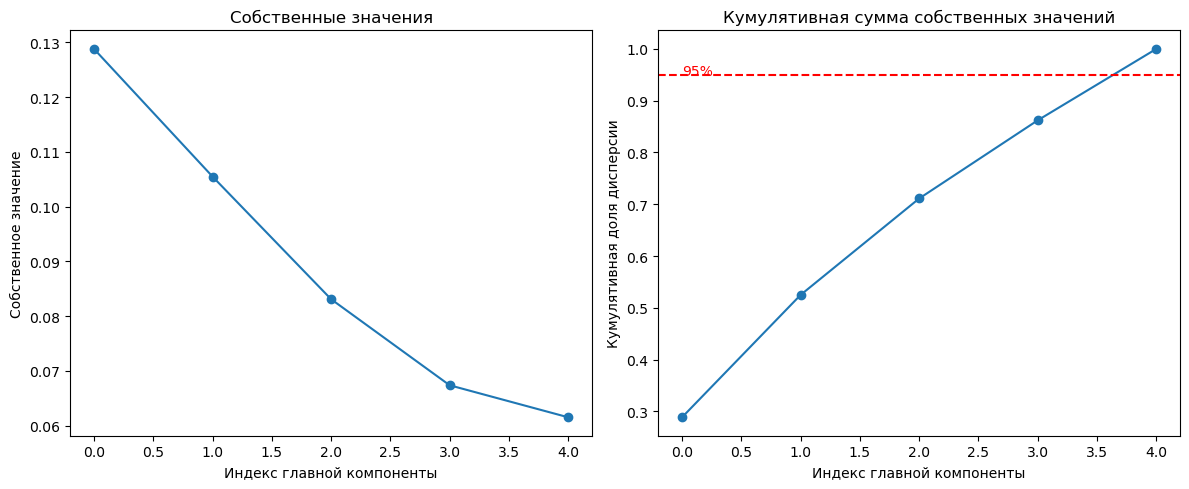

Доля дисперсии первых 15 главных компонент: 1.0000000000000002


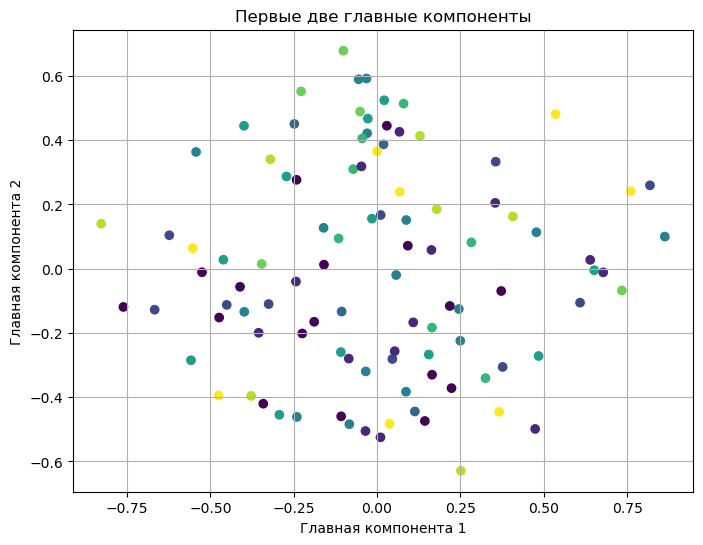

'Собственные числа показывают, сколько вариации данных содержится в каждом направлении (основной компоненте). Чем больше собственное число, \nтем больше разброс данных в этом направлении.\nЕсли точки классов на графике хорошо разделены, значит, их легко классифицировать. Если они переплетаются, то разделить их будет сложнее, \nи может понадобиться использовать дополнительные компоненты для улучшения классификации.'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
class my_PCA:
    def __init__(self):
        self.mean = None
        self.components = None
        self.eigenvalues = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        Xc = X - self.mean

        C = np.cov(Xc, rowvar=False)
        self.eigenvalues, self.components = np.linalg.eig(C)
        
        indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[indices]
        self.components = self.components[:, indices]

    def transform(self, X):
        Xc = X - self.mean
        return Xc @ self.components

    def explained_variance_ratio(self):
        return self.eigenvalues / np.sum(self.eigenvalues)

# Пример 
if __name__ == "__main__":
    np.random.seed(42)
    data = np.random.rand(100, 5)

    pca = my_PCA()
    pca.fit(data)
    transformed_data = pca.transform(data)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(pca.eigenvalues, marker='o')
    plt.title('Собственные значения')
    plt.xlabel('Индекс главной компоненты')
    plt.ylabel('Собственное значение')
    
    cumulative_variance = np.cumsum(pca.explained_variance_ratio())
    
    plt.subplot(1, 2, 2)
    plt.plot(cumulative_variance, marker='o')
    plt.title('Кумулятивная сумма собственных значений')
    plt.xlabel('Индекс главной компоненты')
    plt.ylabel('Кумулятивная доля дисперсии')
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.text(0, 0.95, '95%', color='red')
    
    plt.tight_layout()
    plt.show()

    print("Доля дисперсии первых 15 главных компонент:", np.sum(pca.explained_variance_ratio()[:15]))

    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=np.random.randint(0, 10, size=data.shape[0]), cmap='viridis')
    plt.title('Первые две главные компоненты')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.grid()
    plt.show()

"""Собственные числа показывают, сколько вариации данных содержится в каждом направлении (основной компоненте). Чем больше собственное число, 
тем больше разброс данных в этом направлении.
Если точки классов на графике хорошо разделены, значит, их легко классифицировать. Если они переплетаются, то разделить их будет сложнее, 
и может понадобиться использовать дополнительные компоненты для улучшения классификации."""




In [28]:
import numpy as np
from collections import Counter

class my_kNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# Пример 
if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7]])
    y_train = np.array(['A', 'A', 'A', 'B', 'B'])
    knn = my_kNN(n_neighbors=3)
    knn.fit(X_train, y_train)
    X_test = np.array([[2, 2], [6, 6]])
    predictions = knn.predict(X_test)

    print("Предсказанные классы:", predictions)


Предсказанные классы: ['A' 'B']


In [30]:
from collections import Counter
from sklearn.model_selection import train_test_split
class my_kNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# Пример 
if __name__ == "__main__":
    X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [1, 0], [0, 1]])
    y = np.array(['A', 'A', 'A', 'B', 'B', 'A', 'B'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = my_kNN(n_neighbors=3)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)

    print("Предсказанные классы:", predictions)
    print("Истинные классы:", y_test)


Предсказанные классы: ['B' 'B' 'B']
Истинные классы: ['A' 'A' 'A']


In [44]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

class my_kNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# Пример 
if __name__ == "__main__":
    
    X, y_numeric = make_classification(n_samples=100, n_features=5, n_informative=3, n_classes=2, random_state=42)
    y = np.where(y_numeric == 0, 'A', 'B')  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = my_kNN(n_neighbors=5)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    print("Предсказанные классы:", predictions)
    print("Истинные классы:", y_test)
    print("Точность модели:", accuracy)


Предсказанные классы: ['A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'A' 'B'
 'B' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'B' 'B']
Истинные классы: ['A' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'B'
 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'B']
Точность модели: 0.8666666666666667


In [38]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

class my_kNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# Пример
if __name__ == "__main__":
    X, y_numeric = make_classification(n_samples=100, n_features=64, n_informative=10, n_classes=2, random_state=42)
    y = np.where(y_numeric == 0, 'A', 'B')  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    best_accuracy = 0
    best_params = (0, 0)

    for n_neighbors in range(1, 31):  
        for n_components in range(1, 65):  
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)

            knn = my_kNN(n_neighbors=n_neighbors)
            knn.fit(X_train_pca, y_train)

            predictions = knn.predict(X_test_pca)

            accuracy = accuracy_score(y_test, predictions)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (n_neighbors, n_components)

    print(f"Лучшие параметры: k={best_params[0]}, компоненты={best_params[1]}, точность={best_accuracy:.2f}")


Лучшие параметры: k=3, компоненты=14, точность=0.87


In [ ]:
"""Вывод: эта работа помогла нам лучше понять методы уменьшения размерности и классификации, а также развить навыки программирования
на Python для машинного обучения. Мы установили, что метод главных компонент (PCA) помогает уменьшить количество признаков в данных, 
сохраняя важную информацию. Это делает модели проще, быстрее и лучше для классификации. Алгоритм k-ближайших соседей (kNN) хорошо работает, когда 
классы объектов четко разделены. Точность может меняться в зависимости от настроек алгоритма и подготовки данных. Деление данных на обучающую и 
тестовую выборки помогает избежать переобучения."""